# Repère

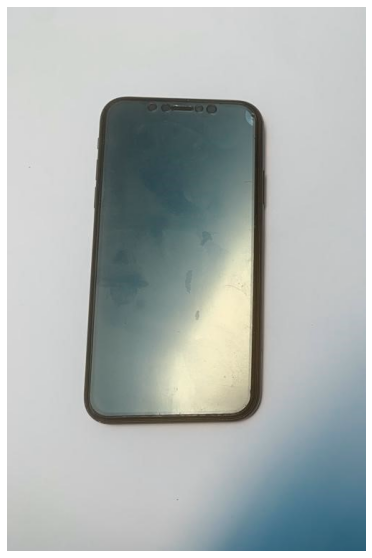

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils.contours


image = cv2.imread('images/ippp.jpeg')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image)
plt.show()

In [123]:
# Cover to grayscale and blur
greyscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
greyscale = cv2.GaussianBlur(greyscale, (7, 7), 0)

# Detect edges and close gaps
canny_output = cv2.Canny(greyscale, 50, 100)
canny_output = cv2.dilate(canny_output, None, iterations=1)
#canny_output = cv2.erode(canny_output, None, iterations=1)



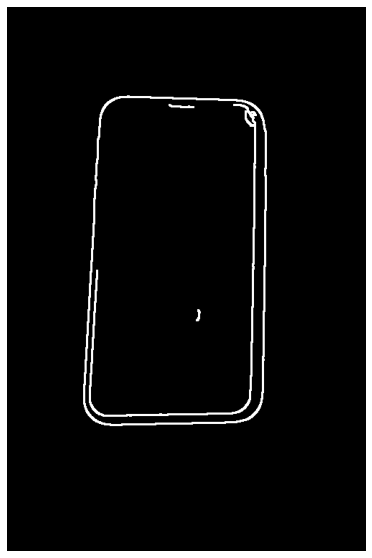

In [124]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(canny_output,cmap="gray")
plt.show()

Couldn't detect two or more objects


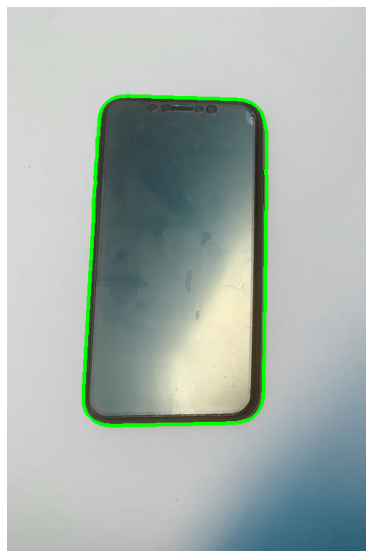

In [125]:
# Get the contours of the shapes, sort l-to-r and create boxes
img = image.copy()
#_, contours, _ = cv2.findContours(canny_output, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours_repere, hierarchy = cv2.findContours(canny_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img,contours_repere,-1,(0,255,0),4)

if len(contours_repere) < 2:
    print("Couldn't detect two or more objects")
    #exit(0)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

In [126]:
(contours_repere, _) = imutils.contours.sort_contours(contours_repere)
#contours_poly = [None]*len(contours)
#boundRect = [None]*len(contours)
for c in contours_repere:
    contours_poly_repere = cv2.approxPolyDP(c, 3, True)
    boundRect_repere = cv2.boundingRect(contours_poly_repere) #top-left-width-height

In [127]:
boundRect_repere

(106, 123, 256, 461)

# Objet à mesuré

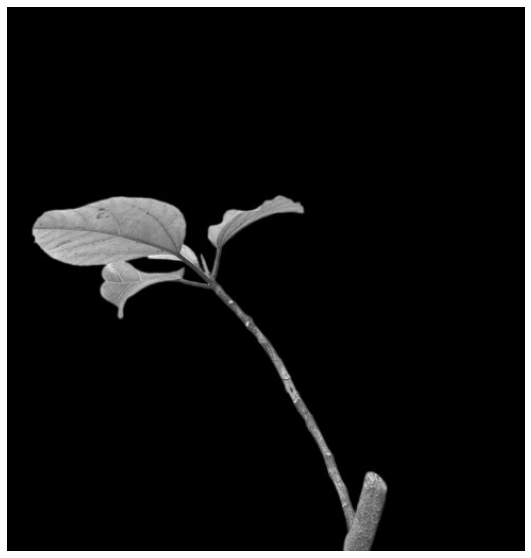

In [137]:
img = cv2.imread("images/test21-removebg-preview.jpg")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
#cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.
cells = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(cells,cmap="gray")
plt.show()

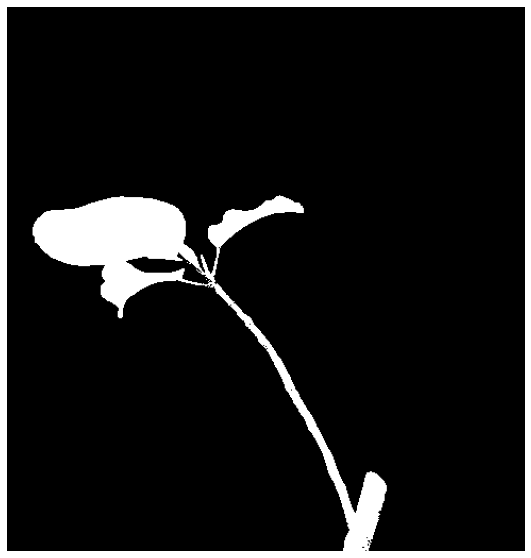

In [138]:
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(thresh,cmap="gray")
plt.show()

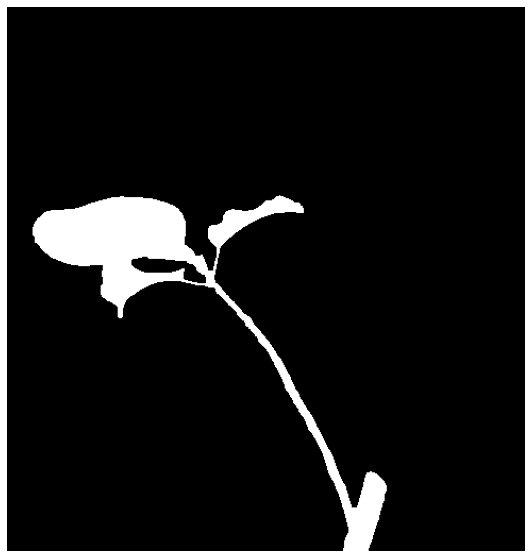

In [139]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(opening,cmap="gray")
plt.show()

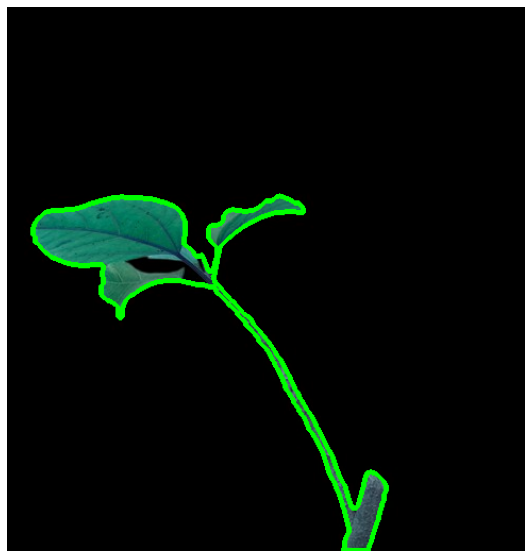

In [140]:
contours_objet, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgCp = img.copy()
cv2.drawContours(imgCp,contours_objet,-1,(0,255,0),4)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(imgCp)
plt.show()

In [141]:
(contours_objet, _) = imutils.contours.sort_contours(contours_objet)
#contours_poly = [None]*len(contours)
#boundRect = [None]*len(contours)
for c in contours_objet:
    contours_poly_objet = cv2.approxPolyDP(c, 3, True)
    boundRect_objet = cv2.boundingRect(contours_poly_objet) #top-left-width-height

In [142]:
len(contours_objet)

1

In [149]:
width = 80
output_image = image.copy()
mmPerPixel = width / boundRect_repere[2]
highestRect = 1000
lowestRect = 0

"""
if boundRect_objet[2] < 50 or boundRect_objet[3] < 50:
    continue
"""
if highestRect > boundRect_objet[1]:
    highestRect = boundRect_objet[1]

if lowestRect < (boundRect_objet[1] + boundRect_objet[3]):
    lowestRect = (boundRect_objet[1] + boundRect_objet[3])

 # Calculate the size of our plant
plantHeight = (lowestRect - highestRect) * mmPerPixel
print("Plant height is {0:.0f} mm".format(plantHeight))


Plant height is 105 mm
